In [2]:
from transformers import pipeline
from Comment_scrapper import youtube_scrapper

In [4]:
with youtube_scrapper(video_url="https://youtu.be/rq8cL2XMM5M") as scrapper:
    comments = scrapper.yt_comments()

Executing teardown


In [6]:
sentiment_analysis = pipeline("sentiment-analysis")
comment_analysis = sentiment_analysis(comments);

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame.from_dict(comment_analysis)

In [11]:
comments = pd.Series(comments)

In [12]:
df["comments"]=comments

In [14]:
df.head()

,label,score,comments
0,POSITIVE,0.974250,"Summary:\nIn this video, Corey distinguishes b..."
1,POSITIVE,0.999793,I'm broke right now but your tutorials are hel...
2,POSITIVE,0.998952,"He actually knows what to teach, \nUnlike most..."
3,POSITIVE,0.999773,"When I was a beginner, I have watched this vid..."
4,NEGATIVE,0.997408,"Hi Corey,\n\nI noticed a small mistake at 5:46..."


In [24]:
(df["label"]=="POSITIVE").value_counts()

True     19
False     1
Name: label, dtype: int64

In [25]:
pos,neg=(df["label"]=="POSITIVE").value_counts()

In [27]:
labels=["positive","negative"]
number=[pos,neg]

In [28]:
import matplotlib.pyplot as plt

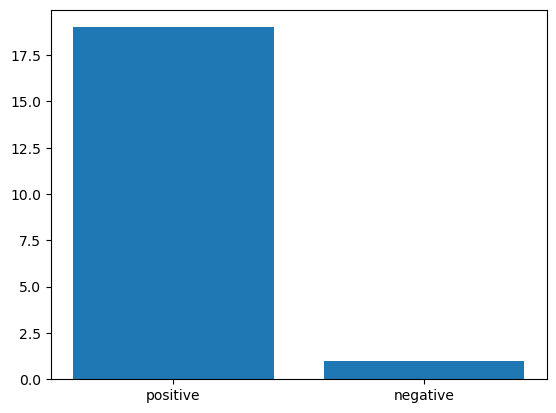

In [53]:
plt.bar(labels,number);

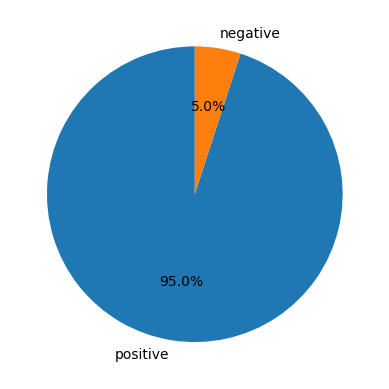

In [52]:
plt.pie(number,labels=labels, autopct='%1.1f%%', startangle=90);

In [46]:
from wordcloud import WordCloud

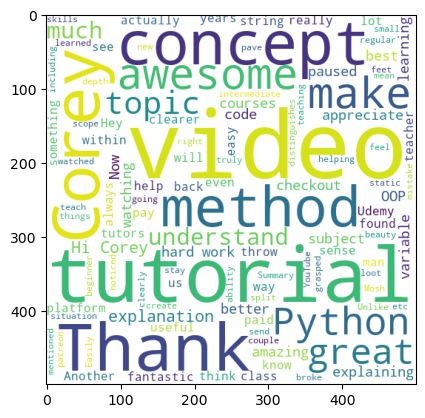

In [56]:
wc = WordCloud(width=500, height=500,min_font_size=10,background_color="white")
df_wc = wc.generate(df['comments'].str.cat(sep=" "))
plt.imshow(df_wc);